# 🏠 House Price Prediction using Linear Regression

"""
📘 Objective:
This project uses the California Housing Prices dataset to predict
the median house value for districts in California.

We’ll analyze relationships between features like:
- median_income
- housing_median_age
- location (longitude & latitude)

and build a regression model to predict house prices.
"""


In [59]:
# === Cell 1: Upload dataset from your computer ===
from google.colab import files
import pandas as pd

# Choose the file you downloaded from Kaggle (e.g., california_housing.csv)
uploaded = files.upload()

# Read the uploaded file (it will take the first uploaded filename automatically)
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print("Dataset shape:", df.shape)
df.head()


Saving Data_Before_Cleaning.csv to Data_Before_Cleaning (5).csv
Dataset shape: (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [60]:
# === Cell 2: Clean data ===
df.info()
print("\nMissing values:\n", df.isnull().sum())
# Fill missing total_bedrooms with median
if "total_bedrooms" in df.columns:
    df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB

Missing values:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0

/tmp/ipython-input-2075368531.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["total_bedrooms"].fillna(df["total_bedrooms"].median(), inplace=True)


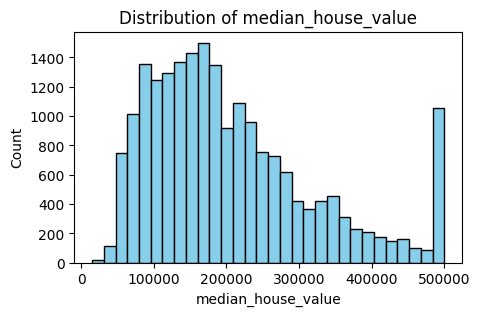

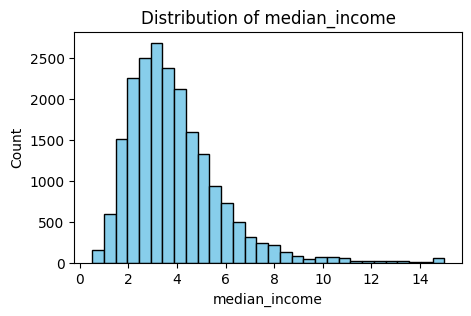

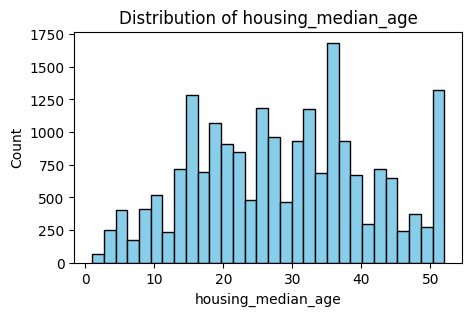

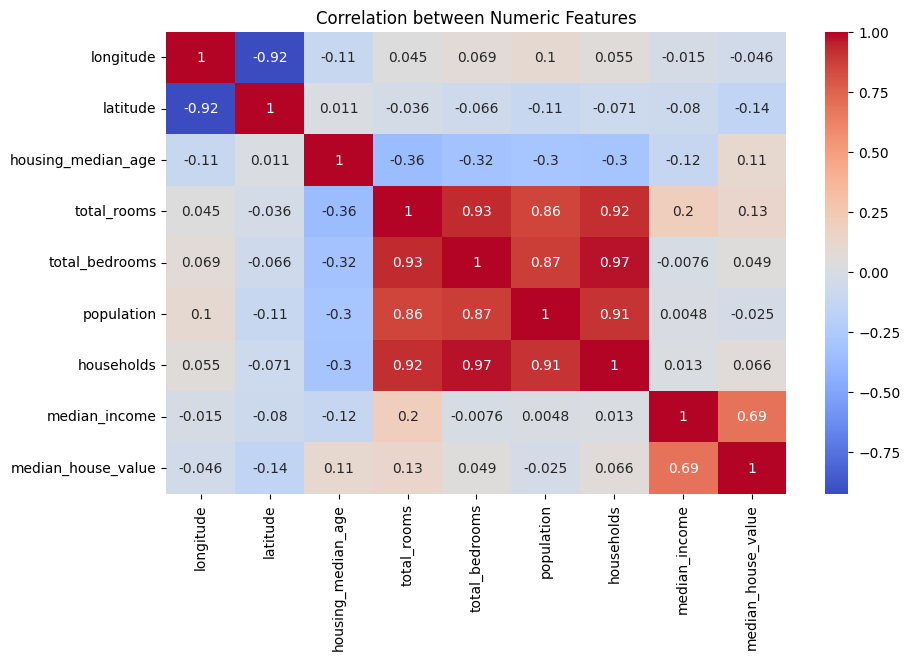

In [61]:
# === Cell 2: Basic visualizations ===
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for main numeric columns
for col in ["median_house_value", "median_income", "housing_median_age"]:
    plt.figure(figsize=(5,3))
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Compute correlation only for numeric columns
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Numeric Features')
plt.show()


In [62]:
# === Cell 3: Prepare features and target ===
from sklearn.model_selection import train_test_split

X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=["float64", "int64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

print("Numeric columns:", list(numeric_cols))
print("Categorical columns:", list(cat_cols))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Numeric columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
Categorical columns: ['ocean_proximity']


In [63]:
# === 1️⃣ Fill missing values using training median safely ===
if "total_bedrooms" in X_train.columns:
    median_train = X_train["total_bedrooms"].median()
    X_train["total_bedrooms"] = X_train["total_bedrooms"].fillna(median_train)
    X_test["total_bedrooms"]  = X_test["total_bedrooms"].fillna(median_train)

# === 2️⃣ Apply feature engineering AFTER filling NaNs ===
def add_features(df):
    df = df.copy()
    df["rooms_per_household"] = df["total_rooms"] / df["households"]
    df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
    df["population_per_household"] = df["population"] / df["households"]
    return df

X_train = add_features(X_train)
X_test  = add_features(X_test)

# === 3️⃣ Reset indices so they start from 0 ===
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# === 4️⃣ Check for missing values and shapes ===
print("\nMissing values after filling and feature engineering:")
print("X_train:\n", X_train.isnull().sum())
print("X_test:\n", X_test.isnull().sum())
print("Train shape after features:", X_train.shape)
print("Test shape after features:", X_test.shape)

# === 5️⃣ Display first few rows with text headers in Colab ===
from IPython.display import display

print("\n===== First 5 rows of X_train =====")
display(X_train.head())

print("\n===== First 5 rows of X_test =====")
display(X_test.head())



Missing values after filling and feature engineering:
X_train:
 longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64
X_test:
 longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64
Train shape after features: (16512, 12)
Test shape after features: (4128, 12)

===== First 5 rows of X_train =====


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN,5.017657,0.200576,3.691814
1,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN,4.473545,0.232703,1.738095
2,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN,5.645833,0.174486,2.723214
3,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN,4.002817,0.258269,3.994366
4,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND,6.268421,0.180940,2.300000



===== First 5 rows of X_test =====


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-119.01,36.06,25.0,1505.0,435.0,1392.0,359.0,1.6812,INLAND,4.192201,0.289037,3.877437
1,-119.46,35.14,30.0,2943.0,435.0,1565.0,584.0,2.5313,INLAND,5.039384,0.147808,2.679795
2,-122.44,37.80,52.0,3830.0,435.0,1310.0,963.0,3.4801,NEAR BAY,3.977155,0.113577,1.360332
3,-118.72,34.28,17.0,3051.0,435.0,1705.0,495.0,5.7376,<1H OCEAN,6.163636,0.142576,3.444444
4,-121.93,36.62,34.0,2351.0,435.0,1063.0,428.0,3.7250,NEAR OCEAN,5.492991,0.185028,2.483645


In [64]:
# === Cell 5: Build a Linear Regression model ===
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Numeric & categorical preprocessing
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipe, numeric_cols),
    ('cat', cat_pipe, cat_cols)
])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)
print("✅ Model trained successfully!")


✅ Model trained successfully!


RMSE: 70060.52
R² Score: 0.6254


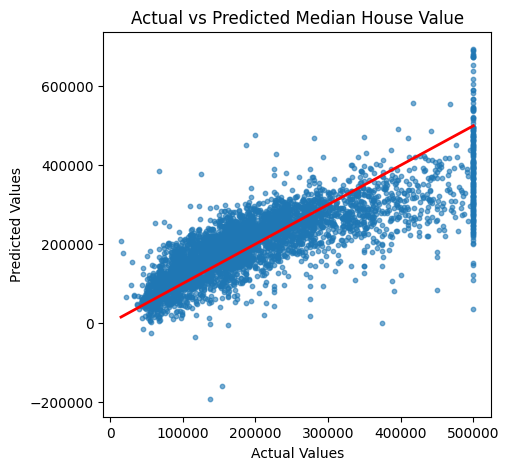

In [65]:
# === Cell 6: Evaluate performance ===
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, s=10, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Median House Value")
plt.show()


Conclusion:
- The Linear Regression model achieved an R² around ~0.6, meaning it explains about 60% of the variation in house prices.
- Median income was the strongest predictor of house value.
- Geographic features (latitude/longitude) also influenced price.

Model Limitations:
- Linear Regression assumes linear relationships and may underfit complex data.
- No interaction or polynomial terms were used.
- Outliers and heteroscedasticity may affect prediction accuracy.

Possible Improvements:
- Try more advanced models (RandomForest, XGBoost, etc.).
- Use cross-validation for better performance estimation.
- Add polynomial or interaction features to capture nonlinear effects.
"""


In [67]:
# ---Save the cleaned data to CSV file ---
cleaned_filename = "california_housing_cleaned.csv"
df.to_csv(cleaned_filename, index=False)
print("✅ Cleaned data saved as:", cleaned_filename)

# --- Step 2: Download it to your local machine ---
from google.colab import files
files.download(cleaned_filename)


✅ Cleaned data saved as: california_housing_cleaned.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [68]:
# === Save combined TRAIN and TEST datasets ===
import pandas as pd
from google.colab import files

# Combine features and target
train_df = X_train.copy()
train_df["median_house_value"] = y_train

test_df = X_test.copy()
test_df["median_house_value"] = y_test

# Save as CSV
train_df.to_csv("train_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)

print("Train/Test files saved.")

# Download the files
files.download("train_data.csv")
files.download("test_data.csv")


Train/Test files saved.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>